In [39]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

In [2]:
dataset_path = '/Desktop/TDL Dataset/'
dataset_path

'/Downloads/TDL Dataset/'

In [3]:
!pip install split-folders

In [4]:
import splitfolders

In [50]:
import os
import cv2
import numpy as np

# Specify the path to your dataset directory
dataset_path = "Desktop/TDL dataset"

# Create a directory to save augmented images
save_path = "Desktop/augmented_images"
os.makedirs(save_path, exist_ok=True)

# Function to perform image rotation augmentation
def augment_images(class_directory):
    # Get the list of image files in the class directory
    image_files = [file for file in os.listdir(class_directory) if file.endswith(('.jpg', '.jpeg', '.png'))]

    # Iterate through each image file
    for image_file in image_files:
        # Read the image
        image_path = os.path.join(class_directory, image_file)
        image = cv2.imread(image_path)
        
        # Randomly generate rotation angle between -10 and +10 degrees
        angle = np.random.randint(-10, 11)
        
        # Perform rotation
        rows, cols = image.shape[:2]
        M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
        rotated_image = cv2.warpAffine(image, M, (cols, rows))
        
        # Save the augmented image
        save_directory = os.path.join(save_path, os.path.basename(class_directory))
        os.makedirs(save_directory, exist_ok=True)
        save_file_path = os.path.join(save_directory, image_file)
        cv2.imwrite(save_file_path, rotated_image)

# Iterate through each class directory
for class_name in os.listdir(dataset_path):
    class_directory = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_directory):
        augment_images(class_directory)

print("Augmentation complete.")


Augmentation complete.


In [71]:
import os
import shutil

# Specify the paths to the original dataset and the augmented images directory
original_dataset_path = "Desktop/TDL Dataset"
augmented_images_path = "Desktop/augmented_images"

# Create a directory to store the combined dataset
combined_dataset_path = "Desktop/Combined"
os.makedirs(combined_dataset_path, exist_ok=True)

# Function to copy files from source directory to destination directory
def copy_files(source_dir, destination_dir):
    print(f"Copying files from {source_dir} to {destination_dir}")
    for file_name in os.listdir(source_dir):
        src_file_path = os.path.join(source_dir, file_name)
        dst_file_path = os.path.join(destination_dir, file_name)
        if os.path.exists(dst_file_path):
            # If a file with the same name already exists, rename it
            file_name, file_extension = os.path.splitext(file_name)
            new_file_name = f"{file_name}_copy{file_extension}"
            dst_file_path = os.path.join(destination_dir, new_file_name)
        shutil.copyfile(src_file_path, dst_file_path)

# Iterate through each directory in the original dataset
for dir_name in os.listdir(original_dataset_path):
    dir_path = os.path.join(original_dataset_path, dir_name)
    
    # Check if the current item is a directory
    if os.path.isdir(dir_path):
        # Create a corresponding directory in the combined dataset path
        combined_dir_path = os.path.join(combined_dataset_path, dir_name)
        os.makedirs(combined_dir_path, exist_ok=True)
        
        # Copy the files from the original dataset directory to the combined directory
        copy_files(dir_path, combined_dir_path)
        
# Iterate through each directory in the augmented images directory
for dir_name in os.listdir(augmented_images_path):
    dir_path = os.path.join(augmented_images_path, dir_name)
    
    # Check if the current item is a directory
    if os.path.isdir(dir_path):
        # Check if the directory already exists in the combined dataset
        combined_dir_path = os.path.join(combined_dataset_path, dir_name)
        if not os.path.exists(combined_dir_path):
            os.makedirs(combined_dir_path, exist_ok=True)
        
        # Copy the files from the augmented images directory to the combined directory
        copy_files(dir_path, combined_dir_path)

# Check the number of files in each class directory
for dir_name in os.listdir(combined_dataset_path):
    class_dir_path = os.path.join(combined_dataset_path, dir_name)
    if os.path.isdir(class_dir_path):
        num_files = len(os.listdir(class_dir_path))
        print(f"Class '{dir_name}' has {num_files} files.")

print("Directories combined and saved in Combined successfully.")


Copying files from Desktop/TDL Dataset/ಷ-1 to Desktop/Combined/ಷ-1
Copying files from Desktop/TDL Dataset/ಫ್ to Desktop/Combined/ಫ್
Copying files from Desktop/TDL Dataset/ಲ to Desktop/Combined/ಲ
Copying files from Desktop/TDL Dataset/ವ to Desktop/Combined/ವ
Copying files from Desktop/TDL Dataset/ಞ to Desktop/Combined/ಞ
Copying files from Desktop/TDL Dataset/೫ to Desktop/Combined/೫
Copying files from Desktop/TDL Dataset/ಧ to Desktop/Combined/ಧ
Copying files from Desktop/TDL Dataset/ಙ to Desktop/Combined/ಙ
Copying files from Desktop/TDL Dataset/ಠ to Desktop/Combined/ಠ
Copying files from Desktop/TDL Dataset/೬ to Desktop/Combined/೬
Copying files from Desktop/TDL Dataset/ಮ to Desktop/Combined/ಮ
Copying files from Desktop/TDL Dataset/ಗ to Desktop/Combined/ಗ
Copying files from Desktop/TDL Dataset/ಙ-1 to Desktop/Combined/ಙ-1
Copying files from Desktop/TDL Dataset/ಳ to Desktop/Combined/ಳ
Copying files from Desktop/TDL Dataset/ಯ to Desktop/Combined/ಯ
Copying files from Desktop/TDL Dataset/ಖ to D

In [72]:
import shutil

# Specify the directory path you want to delete
directory_to_delete = "Desktop/Combined 2"

# Delete the directory
shutil.rmtree(directory_to_delete)

print(f"Directory '{directory_to_delete}' deleted successfully.")


Directory 'Desktop/Combined 2' deleted successfully.


In [73]:
import splitfolders

# Specify the path to your dataset folder
dataset_path = "Desktop/Combined"

# Specify the output folder where the split data will be saved
output_path = "Desktop/Combined 2"

# Split the dataset into train, test, and validation sets with a 70-15-15 split
splitfolders.ratio(dataset_path, output=output_path, seed=42, ratio=(0.7, 0.15, 0.15))


Copying files: 27682 files [00:07, 3480.56 files/s]


In [40]:
import os

# Specify the directory path from which directories with Kannada numerals will be deleted
directory_path = "Desktop/Combined 2/val"

# Kannada numerals from 0 to 9 as array
kannada_numerals = ['೦', '೧', '೨', '೩', '೪', '೫', '೬', '೭', '೮', '೯']

# Function to check if a directory name contains a Kannada numeral
def contains_kannada_numeral(directory_name):
    for numeral in kannada_numerals:
        if numeral in directory_name:
            return True
    return False

# Iterate through each item in the directory
for item in os.listdir(directory_path):
    item_path = os.path.join(directory_path, item)
    # Check if the item is a directory and contains a Kannada numeral
    if os.path.isdir(item_path) and contains_kannada_numeral(item):
        # Delete the directory and its contents
        print(f"Deleting directory: {item_path}")
        try:
            shutil.rmtree(item_path)
            print("Directory deleted successfully.")
        except Exception as e:
            print(f"Error deleting directory: {str(e)}")


In [49]:
img_height,img_width=224, 224
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  "Desktop/Combined 2/train",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 15144 files belonging to 36 classes.


In [41]:
img_height,img_width=224, 224
batch_size=32
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  "Desktop/Combined 2/val",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3240 files belonging to 36 classes.


In [52]:
img_height,img_width=224, 224
batch_size=32
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  "Desktop/Combined 2/test",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3264 files belonging to 36 classes.


In [83]:
class_names = train_ds.class_names
print(class_names)

['ಕ', 'ಖ', 'ಗ', 'ಘ', 'ಙ', 'ಙ-1', 'ಚ', 'ಛ', 'ಜ', 'ಝ', 'ಞ', 'ಟ', 'ಠ', 'ಡ', 'ಢ', 'ಣ', 'ತ', 'ಥ', 'ದ', 'ಧ', 'ನ', 'ಪ', 'ಫ್', 'ಬ', 'ಭ', 'ಮ', 'ಯ', 'ರ', 'ಲ', 'ಳ', 'ವ', 'ಶ', 'ಷ', 'ಷ-1', 'ಸ', 'ಹ']


In [15]:
class_names = test_ds.class_names
print(class_names)

['ಕ', 'ಖ', 'ಗ', 'ಘ', 'ಙ', 'ಙ-1', 'ಚ', 'ಛ', 'ಜ', 'ಝ', 'ಞ', 'ಟ', 'ಠ', 'ಡ', 'ಢ', 'ಣ', 'ತ', 'ಥ', 'ದ', 'ಧ', 'ನ', 'ಪ', 'ಫ್', 'ಬ', 'ಭ', 'ಮ', 'ಯ', 'ರ', 'ಲ', 'ಳ', 'ವ', 'ಶ', 'ಷ', 'ಷ-1', 'ಸ', 'ಹ']


In [18]:
class_names = val_ds.class_names
print(class_names)

['ಕ', 'ಖ', 'ಗ', 'ಘ', 'ಙ', 'ಙ-1', 'ಚ', 'ಛ', 'ಜ', 'ಝ', 'ಞ', 'ಟ', 'ಠ', 'ಡ', 'ಢ', 'ಣ', 'ತ', 'ಥ', 'ದ', 'ಧ', 'ನ', 'ಪ', 'ಫ್', 'ಬ', 'ಭ', 'ಮ', 'ಯ', 'ರ', 'ಲ', 'ಳ', 'ವ', 'ಶ', 'ಷ', 'ಷ-1', 'ಸ', 'ಹ']


/Users/tejas/miniconda3/envs/tensorflow/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 3235 (\N{KANNADA LETTER NNA}) missing from current font.
  func(*args, **kwargs)
/Users/tejas/miniconda3/envs/tensorflow/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Matplotlib currently does not support Kannada natively.
  func(*args, **kwargs)
/Users/tejas/miniconda3/envs/tensorflow/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 3233 (\N{KANNADA LETTER DDA}) missing from current font.
  func(*args, **kwargs)
/Users/tejas/miniconda3/envs/tensorflow/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 3231 (\N{KANNADA LETTER TTA}) missing from current font.
  func(*args, **kwargs)
/Users/tejas/miniconda3/envs/tensorflow/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 3255 (\N{KANNADA LETTER SSA}) missing from current font.
  func(*args, **kwargs)
/Users/tejas/miniconda3/env

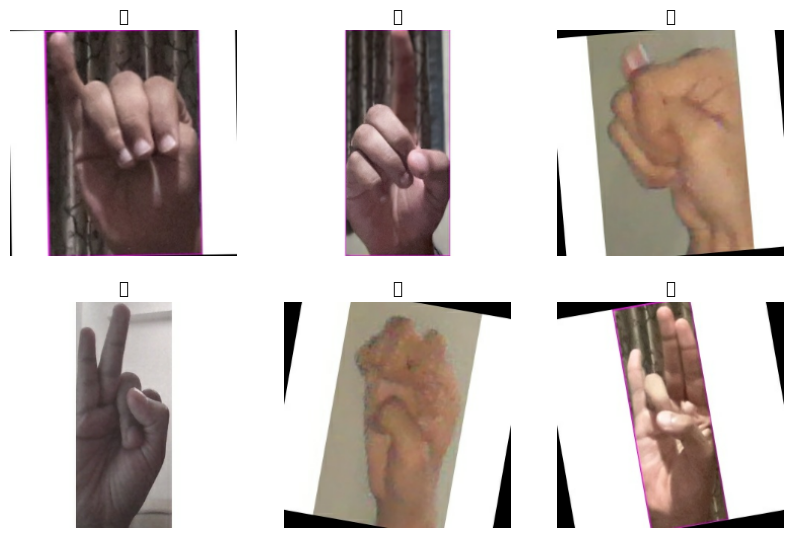

In [84]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [43]:
from tensorflow.keras.layers import Layer

class CustomFlattenLayer(Layer):
    def __init__(self, **kwargs):
        super(CustomFlattenLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        super(CustomFlattenLayer, self).build(input_shape)

    def call(self, inputs):
        return Flatten()(inputs)

    def get_config(self):
        config = super(CustomFlattenLayer, self).get_config()
        return config


In [91]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create a Sequential model
resnet_model = Sequential()

# Load the pre-trained ResNet50 model
pretrained_model = ResNet50(include_top=False, input_shape=(224, 224, 3), pooling='avg', weights='imagenet')

# Freeze all layers in the pre-trained model
for layer in pretrained_model.layers:
    layer.trainable = False

# Add the pre-trained ResNet50 model to the Sequential model
resnet_model.add(pretrained_model)

# Add your custom layers on top of the ResNet50 model
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(256, activation='relu'))
resnet_model.add(Dense(36, activation='softmax'))

# Compile the model
resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [92]:
resnet_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense_3 (Dense)             (None, 512)               1049088   
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 36)                9252      
                                                                 
Total params: 24777380 (94.52 MB)
Trainable params: 1189668 (4.54 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [93]:
resnet_model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [94]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define a ModelCheckpoint callback to save the best model during training
checkpoint = ModelCheckpoint('kannada1.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

epochs = 50  # Number of epochs for training

# Train the model using fit method with defined parameters and callbacks
history = resnet_model.fit(train_ds, validation_data=val_ds, epochs=epochs, batch_size=32, callbacks=[checkpoint], verbose=1)


Epoch 1/50


2024-04-23 21:22:21.510401: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


474/474 [==============================] - ETA: 0s - loss: 0.4743 - accuracy: 0.8730

2024-04-23 21:24:03.723665: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_accuracy improved from -inf to 0.95926, saving model to kannada1.h5


/Users/tejas/miniconda3/envs/tensorflow/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


474/474 [==============================] - 131s 263ms/step - loss: 0.4743 - accuracy: 0.8730 - val_loss: 0.1486 - val_accuracy: 0.9593
Epoch 2/50
474/474 [==============================] - ETA: 0s - loss: 0.2324 - accuracy: 0.9413
Epoch 2: val_accuracy improved from 0.95926 to 0.96327, saving model to kannada1.h5
474/474 [==============================] - 112s 236ms/step - loss: 0.2324 - accuracy: 0.9413 - val_loss: 0.1397 - val_accuracy: 0.9633
Epoch 3/50
474/474 [==============================] - ETA: 0s - loss: 0.2398 - accuracy: 0.9533
Epoch 3: val_accuracy did not improve from 0.96327
474/474 [==============================] - 112s 237ms/step - loss: 0.2398 - accuracy: 0.9533 - val_loss: 0.3168 - val_accuracy: 0.9540
Epoch 4/50
474/474 [==============================] - ETA: 0s - loss: 0.2327 - accuracy: 0.9614
Epoch 4: val_accuracy improved from 0.96327 to 0.97315, saving model to kannada1.h5
474/474 [==============================] - 129s 273ms/step - loss: 0.2327 - accuracy: 0.

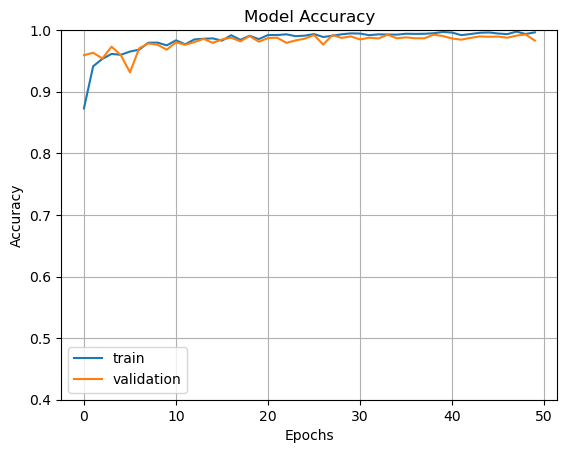

In [95]:

fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

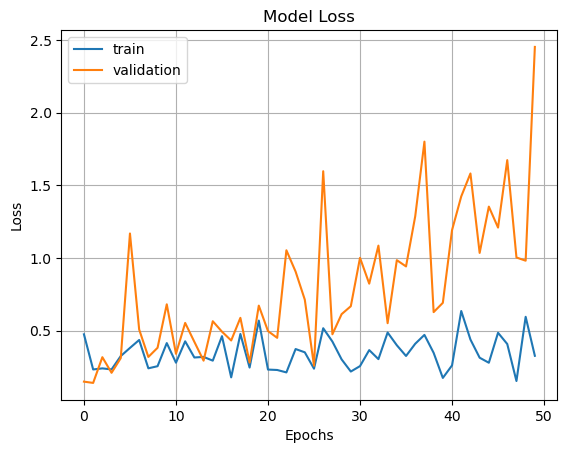

In [96]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [1]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Create a Sequential model
resnet_model = Sequential()

# Load the pre-trained ResNet50 model
pretrained_model = ResNet50(include_top=False, input_shape=(224, 224, 3), pooling='avg', weights='imagenet')

# Freeze all layers in the pre-trained model
for layer in pretrained_model.layers:
    layer.trainable = False

# Add the pre-trained ResNet50 model to the Sequential model
resnet_model.add(pretrained_model)

# Add dropout layer to prevent overfitting
resnet_model.add(Dropout(0.5))

# Add your custom layers on top of the ResNet50 model
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dropout(0.3))  # Adding dropout after the dense layer
resnet_model.add(Dense(256, activation='relu'))
resnet_model.add(Dense(36, activation='softmax'))

# Compile the model
resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [2]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 36)                9252      
                                                                 
Total params: 24777380 (94.52 MB)
Trainable params: 1189

In [47]:
resnet_model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [50]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define a ModelCheckpoint callback to save the best model during training
checkpoint = ModelCheckpoint('kannada2.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

epochs = 50  # Number of epochs for training

# Train the model using fit method with defined parameters and callbacks
history = resnet_model.fit(train_ds, validation_data=val_ds, epochs=epochs, batch_size=32, callbacks=[checkpoint], verbose=1)


Epoch 1/50
474/474 [==============================] - ETA: 0s - loss: 1.1627 - accuracy: 0.7431
Epoch 1: val_accuracy improved from -inf to 0.91512, saving model to kannada2.h5


/Users/tejas/miniconda3/envs/tensorflow/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


474/474 [==============================] - 136s 270ms/step - loss: 1.1627 - accuracy: 0.7431 - val_loss: 0.3145 - val_accuracy: 0.9151
Epoch 2/50
474/474 [==============================] - ETA: 0s - loss: 0.6857 - accuracy: 0.8733
Epoch 2: val_accuracy did not improve from 0.91512
474/474 [==============================] - 113s 238ms/step - loss: 0.6857 - accuracy: 0.8733 - val_loss: 0.6125 - val_accuracy: 0.8951
Epoch 3/50
474/474 [==============================] - ETA: 0s - loss: 0.6662 - accuracy: 0.9084
Epoch 3: val_accuracy improved from 0.91512 to 0.95340, saving model to kannada2.h5
474/474 [==============================] - 155s 327ms/step - loss: 0.6662 - accuracy: 0.9084 - val_loss: 0.3135 - val_accuracy: 0.9534
Epoch 4/50
474/474 [==============================] - ETA: 0s - loss: 0.8737 - accuracy: 0.9081
Epoch 4: val_accuracy did not improve from 0.95340
474/474 [==============================] - 173s 364ms/step - loss: 0.8737 - accuracy: 0.9081 - val_loss: 0.6543 - val_acc

KeyboardInterrupt: 

In [19]:
loaded_model = tf.keras.models.load_model("kannada1.h5")

# Assuming you have the test dataset, test_ds
# Evaluate the loaded model on the test dataset
test_results = loaded_model.evaluate(test_ds)
model.predict(test_ds)

# Extract and print the accuracy from the evaluation results
test_accuracy = test_results[1]
print(f'Test Accuracy: {test_accuracy}')

102/102 [==============================] - 23s 189ms/step
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Test Accuracy: 0.9908088445663452


In [66]:
loaded_model = tf.keras.models.load_model("kannada1.h5")

# Assuming you have the test dataset, test_ds
# Evaluate the loaded model on the test dataset
train_results = loaded_model.evaluate(train_ds)

# Extract and print the accuracy from the evaluation results
train_accuracy = train_results[1]
print(f'Test Accuracy: {train_accuracy}')

474/474 [==============================] - 100s 201ms/step - loss: 0.1392 - accuracy: 0.9980
Test Accuracy: 0.9980190396308899


In [60]:
true_labels = []
for images, labels in test_ds:
    true_labels.extend(labels.numpy())
true_labels = np.array(true_labels)


In [23]:
import os
class_names = sorted(os.listdir("Desktop/Combined 2/train"))
print(class_names)
class_names = class_names[1:]
print(class_names)

['.DS_Store', 'ಕ', 'ಖ', 'ಗ', 'ಘ', 'ಙ', 'ಙ-1', 'ಚ', 'ಛ', 'ಜ', 'ಝ', 'ಞ', 'ಟ', 'ಠ', 'ಡ', 'ಢ', 'ಣ', 'ತ', 'ಥ', 'ದ', 'ಧ', 'ನ', 'ಪ', 'ಫ್', 'ಬ', 'ಭ', 'ಮ', 'ಯ', 'ರ', 'ಲ', 'ಳ', 'ವ', 'ಶ', 'ಷ', 'ಷ-1', 'ಸ', 'ಹ']
['ಕ', 'ಖ', 'ಗ', 'ಘ', 'ಙ', 'ಙ-1', 'ಚ', 'ಛ', 'ಜ', 'ಝ', 'ಞ', 'ಟ', 'ಠ', 'ಡ', 'ಢ', 'ಣ', 'ತ', 'ಥ', 'ದ', 'ಧ', 'ನ', 'ಪ', 'ಫ್', 'ಬ', 'ಭ', 'ಮ', 'ಯ', 'ರ', 'ಲ', 'ಳ', 'ವ', 'ಶ', 'ಷ', 'ಷ-1', 'ಸ', 'ಹ']


In [20]:
model.predict(test_ds)

102/102 [==============================] - 19s 192ms/step


array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [103]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.6 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=3ffc7079cb83949d03b2a9509004d3a47a2a5f57d911ac4b6c8b3b0774b635ae
  Stored in directory: /Users/tejas/Library/Caches/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime
Note: you may need to restart the kernel to use updated packages.


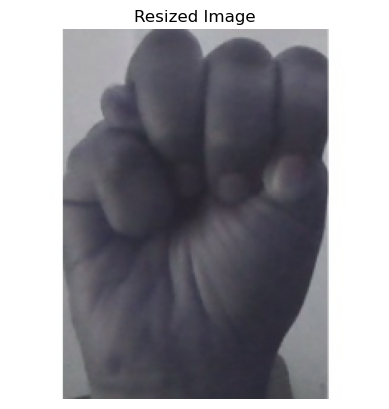

In [69]:
import cv2
import matplotlib.pyplot as plt
from lime import lime_image
from skimage.segmentation import mark_boundaries

# Define a function to resize the image
def resize_image(image_path, target_size=(224, 224)):
    image = cv2.imread(image_path)
    image = cv2.resize(image, target_size)
    return image

# Load the resized image
image_path = 'Desktop/Combined 2/test/ಮ/Image_1709823516.9907377.jpg'
image = resize_image(image_path)

# Show the resized image
plt.imshow(image)
plt.axis('off')
plt.title('Resized Image')
plt.show()


In [8]:
pip install mediapipe==0.10.9

^C
Traceback (most recent call last):
  File "/Users/tejas/miniconda3/envs/tensorflow/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/Users/tejas/miniconda3/envs/tensorflow/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/Users/tejas/miniconda3/envs/tensorflow/lib/python3.10/site-packages/pip/__main__.py", line 22, in <module>
    from pip._internal.cli.main import main as _main
  File "/Users/tejas/miniconda3/envs/tensorflow/lib/python3.10/site-packages/pip/_internal/cli/main.py", line 10, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/Users/tejas/miniconda3/envs/tensorflow/lib/python3.10/site-packages/pip/_internal/cli/autocompletion.py", line 10, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "/Users/tejas/miniconda3/envs/tensorflow/lib/python3.10/site-packages/pip/_internal/cli/main_parser.py", line 9, in <mo

In [38]:
import os
import tensorflow as tf

# Define image dimensions and batch size
img_height, img_width = 224, 224
batch_size = 32
count = 0
# Load the test dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "Desktop/Combined 2/test",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Load the pre-trained model
model = tf.keras.models.load_model("kannada1.h5")

# Map class names to their corresponding indices
class_names = test_ds.class_names
class_indices = {class_name: i for i, class_name in enumerate(class_names)}
print("Class indices:", class_indices)

# Iterate through the dataset and make predictions
for images, labels in test_ds:
    predictions = model.predict(images)
    predicted_classes = tf.argmax(predictions, axis=1)
    for predicted_class, actual_class, directory_name in zip(predicted_classes.numpy(), labels.numpy(), test_ds.file_paths):
        if predicted_class != actual_class:
            print("Predicted class index:", predicted_class)
            print("Actual class index:", actual_class)
            print("Directory name:", os.path.dirname(directory_name))
            count+=1
print(count)


Found 3264 files belonging to 36 classes.
Class indices: {'ಕ': 0, 'ಖ': 1, 'ಗ': 2, 'ಘ': 3, 'ಙ': 4, 'ಙ-1': 5, 'ಚ': 6, 'ಛ': 7, 'ಜ': 8, 'ಝ': 9, 'ಞ': 10, 'ಟ': 11, 'ಠ': 12, 'ಡ': 13, 'ಢ': 14, 'ಣ': 15, 'ತ': 16, 'ಥ': 17, 'ದ': 18, 'ಧ': 19, 'ನ': 20, 'ಪ': 21, 'ಫ್': 22, 'ಬ': 23, 'ಭ': 24, 'ಮ': 25, 'ಯ': 26, 'ರ': 27, 'ಲ': 28, 'ಳ': 29, 'ವ': 30, 'ಶ': 31, 'ಷ': 32, 'ಷ-1': 33, 'ಸ': 34, 'ಹ': 35}
1/1 [==============================] - 5s 5s/step
Predicted class index: 9
Actual class index: 8
Directory name: Desktop/Combined 2/test/ಜ
1/1 [==============================] - 0s 26ms/step
Predicted class index: 4
Actual class index: 3
Directory name: Desktop/Combined 2/test/ಮ
1/1 [==============================] - 0s 23ms/step
Predicted class index: 9
Actual class index: 3
Directory name: Desktop/Combined 2/test/ರ
1/1 [==============================] - 0s 24ms/step
Predicted class index: 3
Actual class index: 1
Directory name: Desktop/Combined 2/test/ಜ
1/1 [==============================] - 0s 25ms/step
Predicted

In [62]:
import os
import numpy as np
import tensorflow as tf
from sklearn.metrics import precision_score, recall_score, f1_score

# Define image dimensions and batch size
img_height, img_width = 224, 224
batch_size = 32

# Load the test dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "Desktop/Combined 2/test",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Load the pre-trained model
model = tf.keras.models.load_model("kannada1.h5")

# Initialize lists to store predicted and actual class labels
predicted_labels = []
actual_labels = []

# Iterate through the dataset and make predictions
for images, labels in test_ds:
    predictions = model.predict(images)
    predicted_classes = tf.argmax(predictions, axis=1)
    predicted_labels.extend(predicted_classes.numpy())
    actual_labels.extend(labels.numpy())

# Convert lists to numpy arrays for calculation
predicted_labels = np.array(predicted_labels)
actual_labels = np.array(actual_labels)

# Calculate precision, recall, and F1-score
precision = precision_score(actual_labels, predicted_labels, average='weighted')
recall = recall_score(actual_labels, predicted_labels, average='weighted')
f1 = f1_score(actual_labels, predicted_labels, average='weighted')

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Found 3264 files belonging to 36 classes.
1/1 [==============================] - 0s 24ms/step
Precision: 0.9909576204319288
Recall: 0.9908088235294118
F1-score: 0.9908018590522344


In [64]:
import os
import numpy as np
import tensorflow as tf
from sklearn.metrics import precision_score, recall_score, f1_score

# Define image dimensions and batch size
img_height, img_width = 224, 224
batch_size = 32


# Load the pre-trained model
model = tf.keras.models.load_model("kannada1.h5")

# Initialize lists to store predicted and actual class labels
predicted_labels = []
actual_labels = []

# Iterate through the dataset and make predictions
for images, labels in train_ds:
    predictions = model.predict(images)
    predicted_classes = tf.argmax(predictions, axis=1)
    predicted_labels.extend(predicted_classes.numpy())
    actual_labels.extend(labels.numpy())

# Convert lists to numpy arrays for calculation
predicted_labels = np.array(predicted_labels)
actual_labels = np.array(actual_labels)

# Calculate precision, recall, and F1-score
precision = precision_score(actual_labels, predicted_labels, average='weighted')
recall = recall_score(actual_labels, predicted_labels, average='weighted')
f1 = f1_score(actual_labels, predicted_labels, average='weighted')

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


1/1 [==============================] - 5s 5s/step
Precision: 0.9980575566004244
Recall: 0.9980190174326465
F1-score: 0.9980167703227397


In [65]:
import os
import numpy as np
import tensorflow as tf
from sklearn.metrics import precision_score, recall_score, f1_score

# Define image dimensions and batch size
img_height, img_width = 224, 224
batch_size = 32


# Load the pre-trained model
model = tf.keras.models.load_model("kannada1.h5")

# Initialize lists to store predicted and actual class labels
predicted_labels = []
actual_labels = []

# Iterate through the dataset and make predictions
for images, labels in val_ds:
    predictions = model.predict(images)
    predicted_classes = tf.argmax(predictions, axis=1)
    predicted_labels.extend(predicted_classes.numpy())
    actual_labels.extend(labels.numpy())

# Convert lists to numpy arrays for calculation
predicted_labels = np.array(predicted_labels)
actual_labels = np.array(actual_labels)

# Calculate precision, recall, and F1-score
precision = precision_score(actual_labels, predicted_labels, average='weighted')
recall = recall_score(actual_labels, predicted_labels, average='weighted')
f1 = f1_score(actual_labels, predicted_labels, average='weighted')

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


1/1 [==============================] - 5s 5s/step
Precision: 0.9932221108647475
Recall: 0.9929012345679012
F1-score: 0.9929302360624358


1/1 [==============================] - 0s 30ms/step


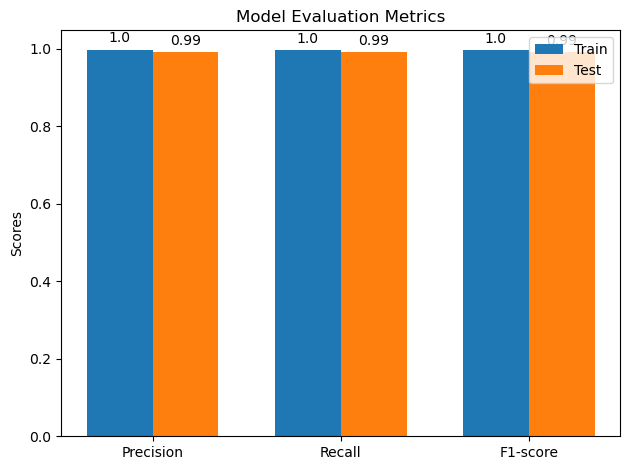

In [76]:
import os
import numpy as np
import tensorflow as tf
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Define image dimensions and batch size
img_height, img_width = 224, 224
batch_size = 32

# Load the pre-trained model
model = tf.keras.models.load_model("kannada1.h5")

# Initialize lists to store predicted and actual class labels for train and test sets
train_predicted_labels = []
train_actual_labels = []
test_predicted_labels = []
test_actual_labels = []

# Iterate through the train dataset and make predictions
for images, labels in train_ds:
    predictions = model.predict(images)
    predicted_classes = tf.argmax(predictions, axis=1)
    train_predicted_labels.extend(predicted_classes.numpy())
    train_actual_labels.extend(labels.numpy())

# Convert lists to numpy arrays for calculation
train_predicted_labels = np.array(train_predicted_labels)
train_actual_labels = np.array(train_actual_labels)

# Iterate through the test dataset and make predictions
for images, labels in test_ds:
    predictions = model.predict(images)
    predicted_classes = tf.argmax(predictions, axis=1)
    test_predicted_labels.extend(predicted_classes.numpy())
    test_actual_labels.extend(labels.numpy())

# Convert lists to numpy arrays for calculation
test_predicted_labels = np.array(test_predicted_labels)
test_actual_labels = np.array(test_actual_labels)

# Calculate precision, recall, and F1-score for train and test sets
train_precision = precision_score(train_actual_labels, train_predicted_labels, average='weighted')
train_recall = recall_score(train_actual_labels, train_predicted_labels, average='weighted')
train_f1 = f1_score(train_actual_labels, train_predicted_labels, average='weighted')

test_precision = precision_score(test_actual_labels, test_predicted_labels, average='weighted')
test_recall = recall_score(test_actual_labels, test_predicted_labels, average='weighted')
test_f1 = f1_score(test_actual_labels, test_predicted_labels, average='weighted')

# Visualize the results
metrics = ['Precision', 'Recall', 'F1-score']
train_scores = [train_precision, train_recall, train_f1]
test_scores = [test_precision, test_recall, test_f1]

x = np.arange(len(metrics))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, train_scores, width, label='Train')
rects2 = ax.bar(x + width/2, test_scores, width, label='Test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Model Evaluation Metrics')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Function to add labels on top of the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


In [79]:
!pip install pydot

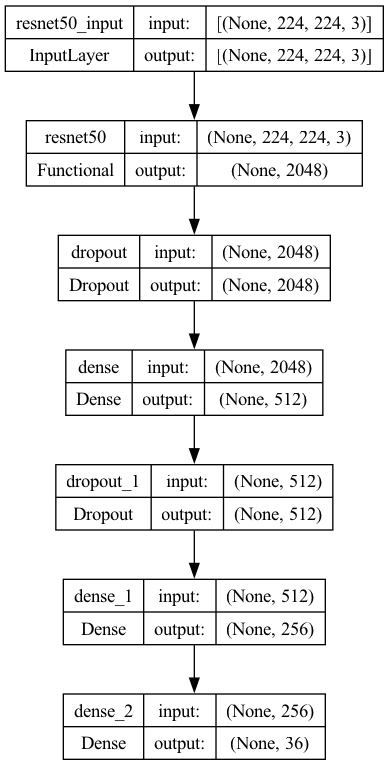

In [3]:
from tensorflow.keras.utils import plot_model
# Plot the model architecture
plot_model(resnet_model, to_file='resnet_model.png', show_shapes=True, show_layer_names=True)


In [86]:
pip install pydot graphviz


Note: you may need to restart the kernel to use updated packages.
